<a href="https://colab.research.google.com/github/HarryWallrus/CHEG_672_misc_work/blob/main/CHEG_672_Lab_2%2C_Day_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1: Upload .xlsx dataset

In [ ]:
# Import necessary libraries
import pandas as pd
from google.colab import files

# Upload the file
uploaded = files.upload()

# Load the dataset
file_name = "Dataset Clean 2.xlsx"  # Replace with your actual file name
df = pd.read_excel(file_name)

# Display the first few rows of the dataset
df.head()

Saving Dataset Clean 2.xlsx to Dataset Clean 2 (4).xlsx


,Number,Biomass,TP,TemP,Time (min),PS,BET,PV,C,H,N,O,Qm (mg/g)
0,1.0,Waste sludge (paper),Citalopram,315,150.0,9.82,3.43,0.02,30.84,2.14,0.43,20.32,4.4
1,NaN,Waste sludge (paper),Citalopram,600,10.0,1.37,94.39,0.06,30.69,0.96,0.32,20.41,3.8
2,NaN,Waste sludge (paper),Citalopram,800,10.0,1.37,120.86,0.08,28.81,0.47,0.33,19.29,8.5
3,NaN,Waste sludge (Biological),Citalopram,800,150.0,1.41,209.12,0.13,27.05,0.82,0.33,9.73,19.6
4,NaN,Waste sludge (Biological),Citalopram,800,10.0,3.69,10.82,0.02,35.35,0.72,2.47,2.01,4.3


Step 2: Check for Missing Data

In [ ]:
# Check for missing data
missing_data = df.isnull().sum()

# Display columns with missing data
missing_data[missing_data > 0]

,0
Number,50
Biomass,1


In [ ]:
# drop rows with missing data (Biomass)
df_cleaned = df.dropna(axis=1)

In [ ]:
# Example of imputting missing values with the mean
df['PS'].fillna(df['PS'].mean(), inplace=True)
df['PV'].fillna(df['PV'].mean(), inplace=True)
df['C'].fillna(df['C'].mean(), inplace=True)
df['H'].fillna(df['H'].mean(), inplace=True)
df['O'].fillna(df['O'].mean(), inplace=True)
df['N'].fillna(df['N'].mean(), inplace=True)
df['Qm (mg/g)'].fillna(df['Qm (mg/g)'].mean(), inplace=True)

In [ ]:
# Remove the first column of the dataset
df = df.iloc[:, 1:]

# Display the first few rows to confirm the column is removed
df.head()


,Biomass,TP,TemP,Time (min),PS,BET,PV,C,H,N,O,Qm (mg/g)
0,Waste sludge (paper),Citalopram,315,150.0,9.82,3.43,0.02,30.84,2.14,3.26,20.32,119.745
1,Waste sludge (paper),Citalopram,600,10.0,1.37,94.39,0.06,30.69,0.96,3.26,20.41,119.745
2,Waste sludge (paper),Citalopram,800,10.0,1.37,120.86,0.08,28.81,0.47,3.26,19.29,119.745
3,Waste sludge (Biological),Citalopram,800,150.0,1.41,209.12,0.13,27.05,0.82,3.26,9.73,119.745
4,Waste sludge (Biological),Citalopram,800,10.0,3.69,10.82,0.02,35.35,0.72,3.26,2.01,119.745


Step 3: Check and Correct Irregular Data in Numeric Columns

In [ ]:
# Print the dataset's columns
print(df.columns)

# Check the data types to identify numeric columns
df.dtypes

Index(['Biomass', 'TP', 'TemP', 'Time (min)', 'PS', 'BET', 'PV', 'C', 'H', 'N',
       'O', 'Qm (mg/g)'],
      dtype='object')


,0
Biomass,object
TP,object
TemP,int64
Time (min),float64
PS,float64
BET,float64
PV,float64
C,float64
H,float64
N,float64


In [ ]:
# Replace 'your_column' with the actual column name that needs conversion
df['Qm (mg/g)'] = df['Qm (mg/g)'].str.replace(',', '.').astype(float)
df['N'] = df['N'].str.replace(',', '.').astype(float)

Step 4: Categorical variable identification

In [ ]:
# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
# Display categorical columns
categorical_columns

Index(['Biomass', 'TP'], dtype='object')

Step 5: One-hot encoding for categorical variables

In [ ]:
# Apply one-hot encoding to categorical variables
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Display the first few rows of the encoded dataset
df_encoded.head()

,TemP,Time (min),PS,BET,PV,C,H,N,O,Qm (mg/g),...,TP_Norfloxacin,TP_Oxytetracycline,TP_Oxytetracycline,TP_Salicylic acid,TP_Sulfadiazine,TP_Sulfamethoxazole,TP_Tetracycline,TP_Triclosan,TP_ibuprofen,TP_sulfamethazine
0,315,150.0,9.82,3.43,0.02,30.84,2.14,3.26,20.32,119.745,...,False,False,False,False,False,False,False,False,False,False
1,600,10.0,1.37,94.39,0.06,30.69,0.96,3.26,20.41,119.745,...,False,False,False,False,False,False,False,False,False,False
2,800,10.0,1.37,120.86,0.08,28.81,0.47,3.26,19.29,119.745,...,False,False,False,False,False,False,False,False,False,False
3,800,150.0,1.41,209.12,0.13,27.05,0.82,3.26,9.73,119.745,...,False,False,False,False,False,False,False,False,False,False
4,800,10.0,3.69,10.82,0.02,35.35,0.72,3.26,2.01,119.745,...,False,False,False,False,False,False,False,False,False,False


Step 6: Splitting the Data into X (Features) and y (Target)

In [ ]:
# Assuming 'target_column' is the name of your target variable

X = df_encoded.drop('Qm (mg/g)', axis=1)
y = df_encoded['Qm (mg/g)']

# Display the first few rows of X and y
X.head(), y.head()

(   TemP  Time (min)    PS     BET    PV      C     H     N      O  \
 0   315       150.0  9.82    3.43  0.02  30.84  2.14  3.26  20.32   
 1   600        10.0  1.37   94.39  0.06  30.69  0.96  3.26  20.41   
 2   800        10.0  1.37  120.86  0.08  28.81  0.47  3.26  19.29   
 3   800       150.0  1.41  209.12  0.13  27.05  0.82  3.26   9.73   
 4   800        10.0  3.69   10.82  0.02  35.35  0.72  3.26   2.01   
 
    Biomass_Alfalfa  ...  TP_Norfloxacin  TP_Oxytetracycline  \
 0            False  ...           False               False   
 1            False  ...           False               False   
 2            False  ...           False               False   
 3            False  ...           False               False   
 4            False  ...           False               False   
 
    TP_Oxytetracycline   TP_Salicylic acid  TP_Sulfadiazine  \
 0                False              False            False   
 1                False              False            False   
 2 

Step 7: Additional data processing techniques

In [ ]:
# Display summary statistics
summary_statistics = df.describe()
print(summary_statistics)

             TemP  Time (min)          PS          BET         PV          C  \
count   86.000000   86.000000   86.000000    86.000000  86.000000  86.000000   
mean   566.453488  151.347287   13.908847   191.444442   0.152331  57.293855   
std    170.921148  126.607738   38.729014   298.769825   0.179817  20.035848   
min    300.000000    0.100000    1.320000     0.479000   0.001000   9.460000   
25%    450.000000   60.000000    2.910000     7.100000   0.020000  42.192500   
50%    500.000000  120.000000    4.440000    59.090000   0.100000  58.660000   
75%    700.000000  150.000000    9.865000   295.500000   0.223750  73.732500   
max    950.000000  480.000000  213.290000  1838.860000   1.030000  89.570000   

               H             N          O   Qm (mg/g)  
count  86.000000  8.600000e+01  86.000000   86.000000  
mean    1.927890  3.260000e+00  16.469048  119.745000  
std     1.609467  1.786775e-15  10.828736   18.154828  
min     0.000000  3.260000e+00   0.670000    1.390000  

Step 7.1: Heatmap excluding the one-hot encoded dataset

In [ ]:
# Assuming df_encoded is your dataset after one-hot encoding
encoded_columns = [col for col in df_encoded.columns if col not in df.columns]

# Print encoded columns to verify
print("One-hot encoded columns:")
print(encoded_columns)

One-hot encoded columns:
['Biomass_Alfalfa', 'Biomass_Biosolids from muncipal waste', 'Biomass_Burcucumber plants', 'Biomass_Califlower Roots ', 'Biomass_Cassava waste', 'Biomass_Chinese herbal medicine residues (Plant)', 'Biomass_Coffee Grounds', 'Biomass_Corn stalk', 'Biomass_Corn straw', 'Biomass_Cow Manure', 'Biomass_Eucalyptus sawdust ', 'Biomass_Eucalypus ', 'Biomass_Fallen leaves ', 'Biomass_Hollow Tree', 'Biomass_Maize straw ', 'Biomass_Parthenium hysterophorus', 'Biomass_Pinewood', 'Biomass_Potato plant stem clay', 'Biomass_Processing waste', 'Biomass_Quince', 'Biomass_Rice Straw', 'Biomass_River sediment', 'Biomass_Sludge (pharmaceutical)', 'Biomass_Spirulina sp. (microalgae)', 'Biomass_Straw biochar', 'Biomass_Swine manure', 'Biomass_Tea leaves', 'Biomass_Thalia dealbata', 'Biomass_Vine', 'Biomass_Walnut tree', 'Biomass_Waste sludge (Biological)', 'Biomass_Waste sludge (paper)', 'Biomass_Wood chip biochar', 'Biomass_bagasse (100 mM FeCl3)', 'Biomass_bagasse (200 mM FeCl3)', 

In [ ]:
# Exclude one-hot encoded columns from the dataset
df_no_encoding = df_encoded.drop(columns=encoded_columns)

# Alternatively, if you have the original dataframe before encoding, just use df

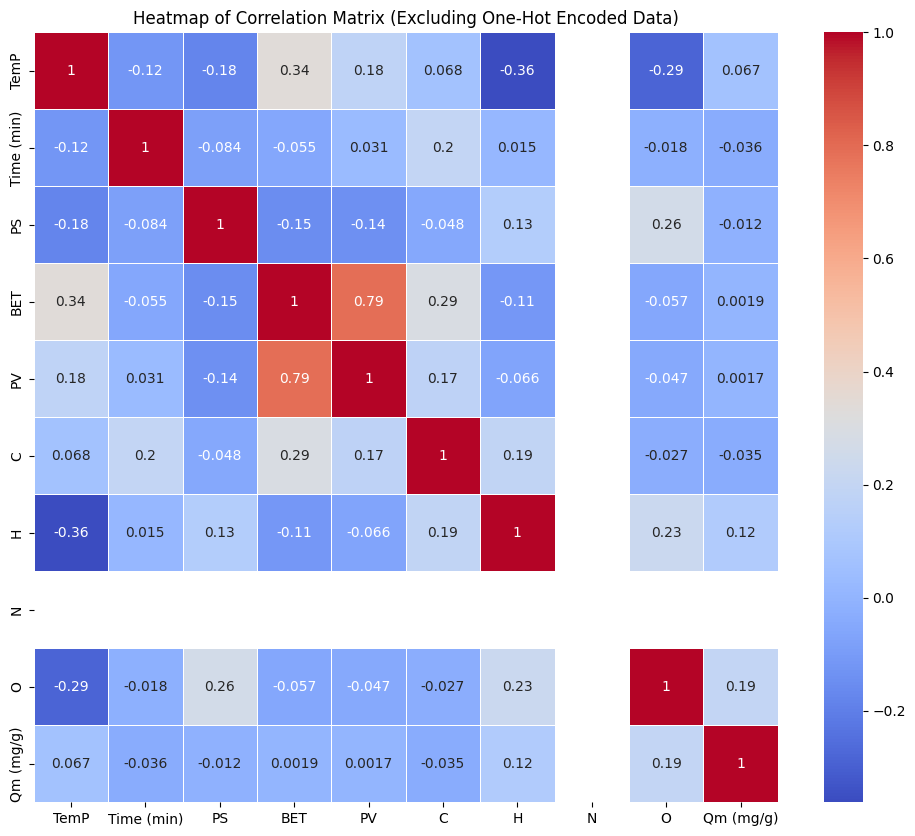

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot a heatmap excluding the one-hot encoded columns
plt.figure(figsize=(12, 10))
sns.heatmap(df_no_encoding.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Correlation Matrix (Excluding One-Hot Encoded Data)')
plt.show()

Step 7.2 Plotting a Pairplot for Visualizing Relationships

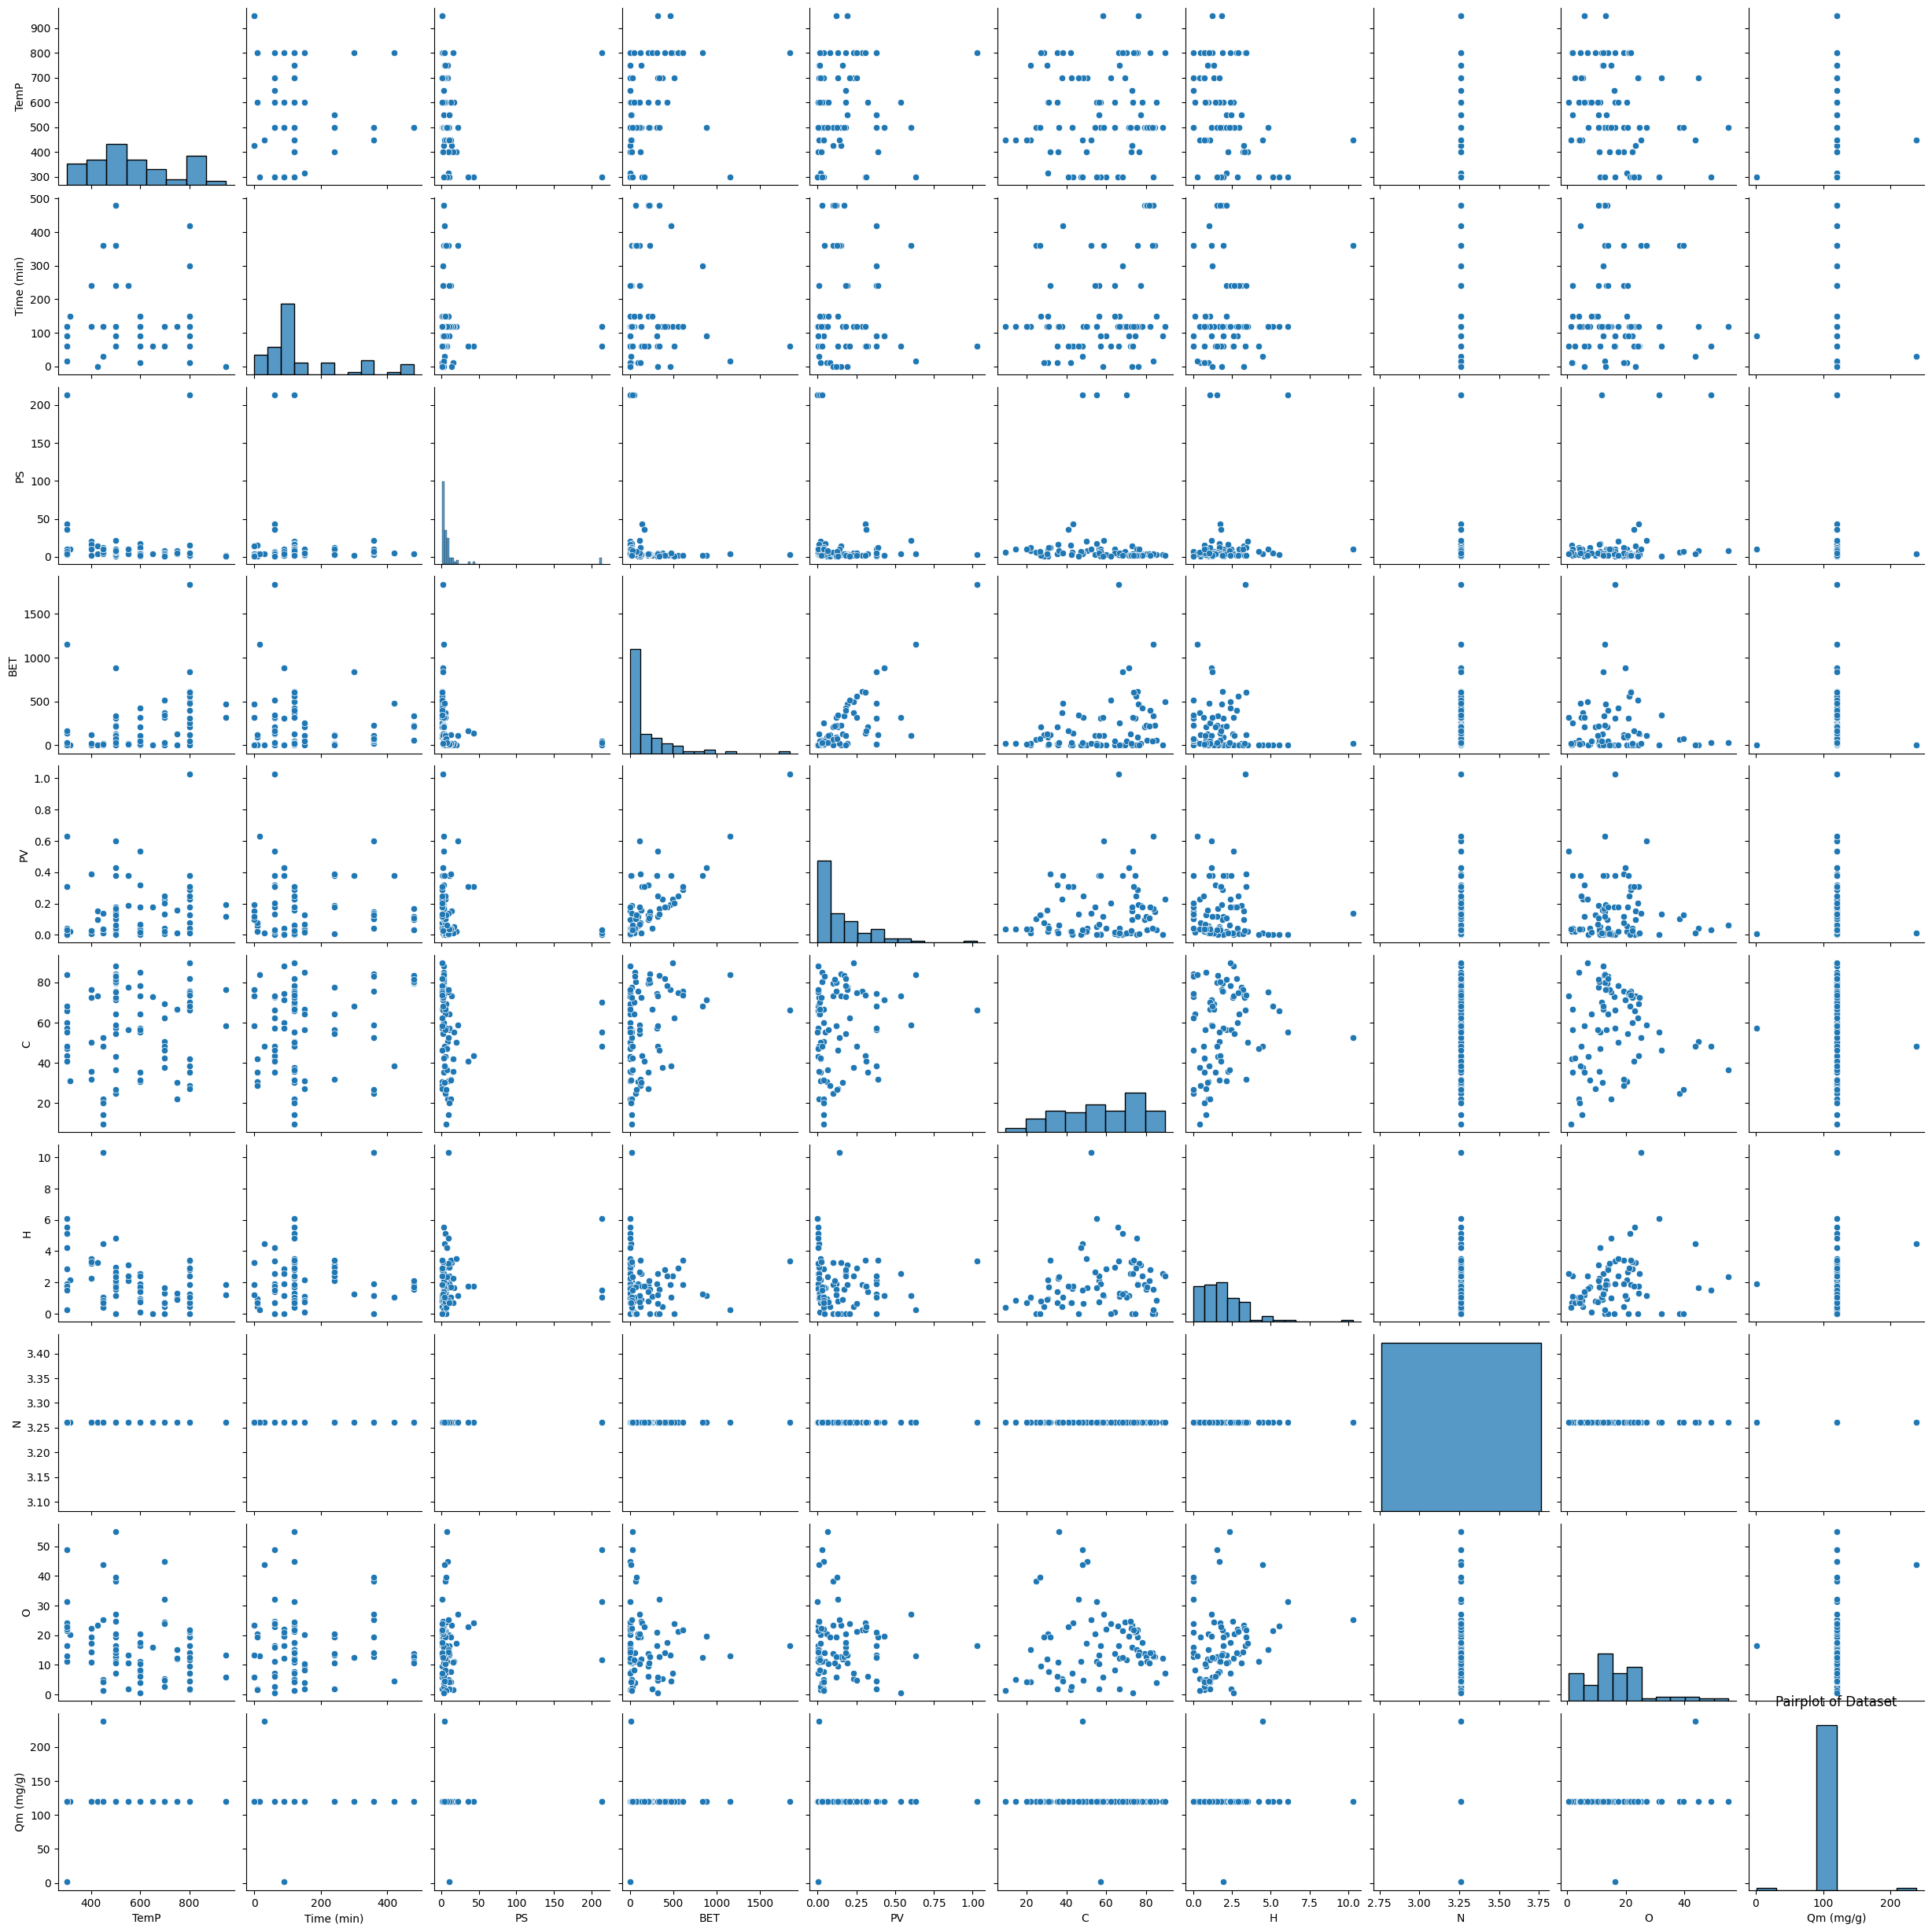

In [ ]:
# Plot a pairplot to visualize relationships between variables
sns.pairplot(df)
plt.title('Pairplot of Dataset')
plt.show()

Step 7.3: Histograms

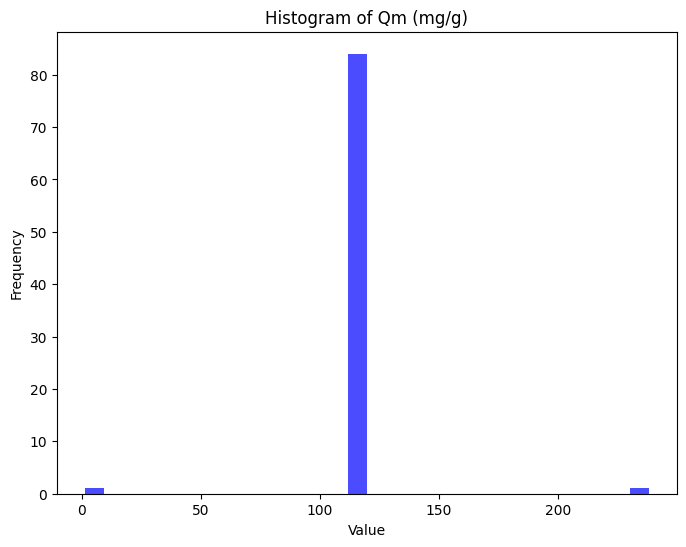

In [ ]:
import matplotlib.pyplot as plt

# Plotting a histogram for a specific numeric column
# Change 'your_numeric_column' to the name of the column you wish to plot a histogram for
plt.figure(figsize=(8, 6))
plt.hist(df['Qm (mg/g)'], bins=30, alpha=0.7, color='blue')
plt.title('Histogram of Qm (mg/g)')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

Step 7.4: Box Plots

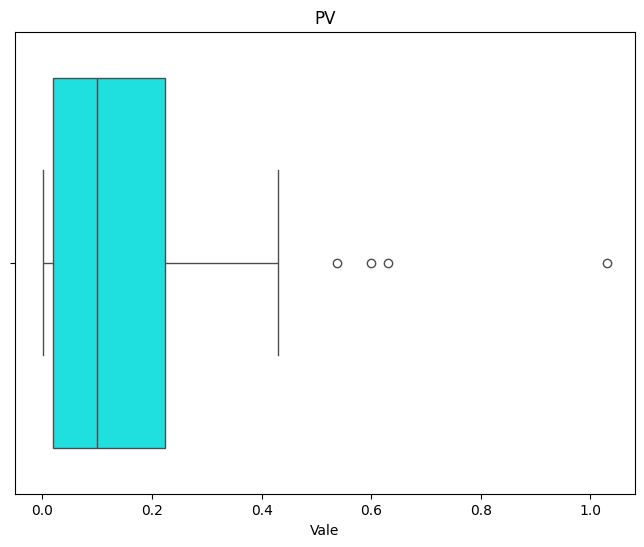

In [ ]:
import seaborn as sns

# Plotting a boxplot for a specific numeric column
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['PV'], color='cyan')
plt.title('PV')
plt.xlabel('Vale')
plt.show()

Step 7.5: Scatter Plot

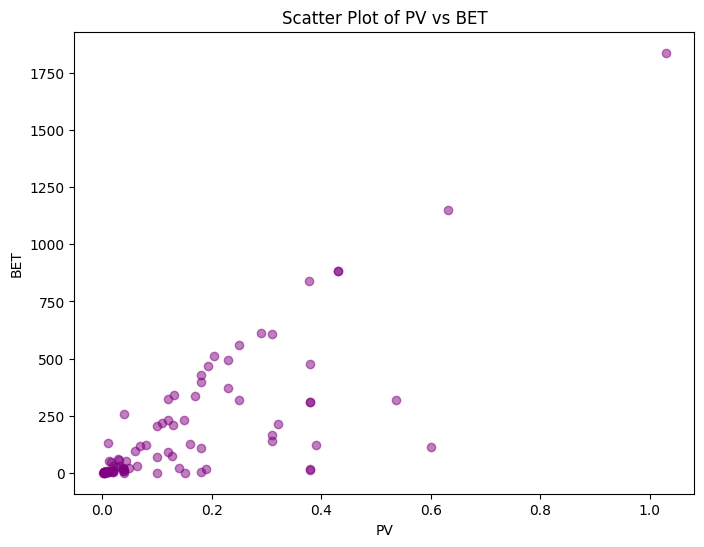

In [ ]:
# Plotting a scatter plot for two numeric columns
plt.figure(figsize=(8, 6))
plt.scatter(df['PV'], df['BET'], alpha=0.5, color='purple')
plt.title('Scatter Plot of PV vs BET')
plt.xlabel('PV')
plt.ylabel('BET')
plt.show()

Step 7.6: Violin Plot

<ipython-input-34-ab3241f4c242>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='TP', y='PV', data=df, palette='muted')


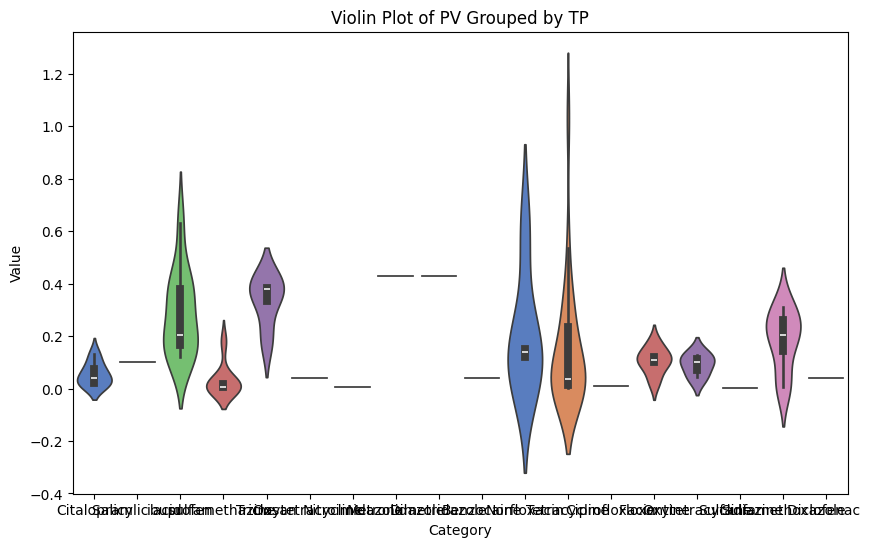

In [ ]:
# Plotting a violin plot for a specific numeric column grouped by a categorical column
plt.figure(figsize=(10, 6))
sns.violinplot(x='TP', y='PV', data=df, palette='muted')
plt.title('Violin Plot of PV Grouped by TP')
plt.xlabel('Category')
plt.ylabel('Value')
plt.show()